In [1]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
#import files
diamond = pd.read_csv('diamonds.csv', header = 0, index_col = 0)
diamond.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price
1,0.51,Premium,4,F,VS1,4,1749
2,2.25,Fair,1,G,I1,1,7069
3,0.70,Very Good,3,E,VS2,5,2757
4,0.47,Good,2,F,VS1,4,1243
5,0.30,Ideal,5,G,VVS1,7,789


In [3]:
diamond.describe()

,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,3.903980,4.126700,3939.103500
std,0.474651,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000


# Check for multicollinearity

,carat,cut_ord,clarity_ord,price
carat,1.000000,-0.135679,-0.343725,0.921777
cut_ord,-0.135679,1.000000,0.189461,-0.053804
clarity_ord,-0.343725,0.189461,1.000000,-0.142159
price,0.921777,-0.053804,-0.142159,1.000000


<AxesSubplot:>

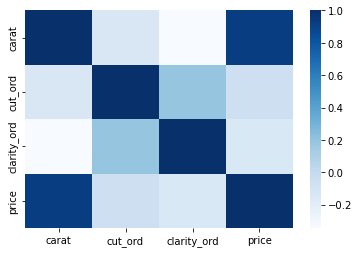

In [10]:
#print out a correlation matrix of diamond
corr = diamond.corr()
display(corr)

#plot a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, cmap ='Blues')

Since price is the dependent variable, although a correlation 0.92 is hight, it doesn't mean there is multicollinearity. From the matrix, none of the independent variables have high correlations, which means there is no multicollinearity. We can continue to the next step.

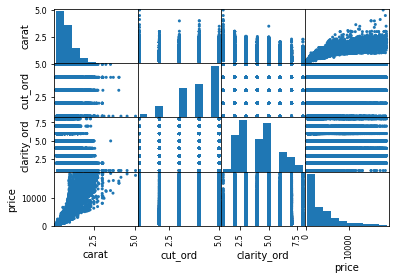

In [11]:
pd.plotting.scatter_matrix(diamond, alpha = 1)
plt.show()

The graph above shows that except price, all the other variables are scattered and non-related.

In [12]:
#create a description with +- 3 standard deviation in order to decide whether we want to delete outliers. (In this case we don't)

desc_diamond = diamond.describe()
desc_diamond

,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,3.903980,4.126700,3939.103500
std,0.474651,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000


In [13]:
desc_diamond.loc['+3_std'] = desc_diamond.loc['mean'] + (desc_diamond.loc['std']*3)
desc_diamond.loc['-3_std'] = desc_diamond.loc['mean'] - (desc_diamond.loc['std']*3)

desc_diamond

,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.798597,3.903980,4.126700,3939.103500
std,0.474651,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000
+3_std,2.222551,7.255109,9.123391,15926.742997
-3_std,-0.625357,0.552851,-0.869991,-8048.535997


# Build Multiple Linear Regression Model using Machine Learning

In [14]:
#split the data by defining the input variables and output variable
X = diamond[['carat','cut_ord','clarity_ord']]
Y = diamond[['price']]

print(X.head())
print('-'*30)
print(Y.head())

   carat  cut_ord  clarity_ord
1   0.51        4            4
2   2.25        1            1
3   0.70        3            5
4   0.47        2            4
5   0.30        5            7
------------------------------
   price
1   1749
2   7069
3   2757
4   1243
5    789


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

regression_model = LinearRegression()

regression_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
#grab the intercept and the coef
intercept = regression_model.intercept_[0]
intercept

-5242.933934312547

In [18]:
print('The intercept for our model is {:.4}'.format(intercept))

The intercept for our model is -5.243e+03


In [19]:
#loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print('The coefficient for {} is {:.4}'.format(coef[0],coef[1]))

The coefficient for carat is 8.355e+03
The coefficient for cut_ord is 158.9
The coefficient for clarity_ord is 457.5


### From the results above, the regression formula is
### Price = -5243 + 8355*carat + 158.9*cut_ord + 457.5*clarity_ord

# Verify the model

In [20]:
y_predict = regression_model.predict(X_test)
y_predict

array([[ 577.05722877],
       [3683.90529238],
       [5876.45496949],
       ...,
       [8629.38675149],
       [-111.61227936],
       [-178.85438894]])

In [22]:
#Evaluating the model using statsmodel
#Creating a constant, define input
X2 = sm.add_constant(X)
model = sm.OLS(Y,X2)
est = model.fit()

In [23]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.298e+05
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:04:42   Log-Likelihood:            -4.3126e+05
No. Observations:               50000   AIC:                         8.625e+05
Df Residuals:                   49996   BIC:                         8.626e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5255.2231     30.320   -173.326      0.000   -5314.650   -5195.796
carat        8363.4167     13.565    616.547      0.000    8336.829    8390.004
cut_ord       160.3786      5.513     29.093      0.000     149.574     171.183
clarity_ord   457.8018      3.901    117.366      0.000     450.157     465.447
==============================================================================
Omnibus:                    11093.961   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169582.750
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                      11.928   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Data Visualization

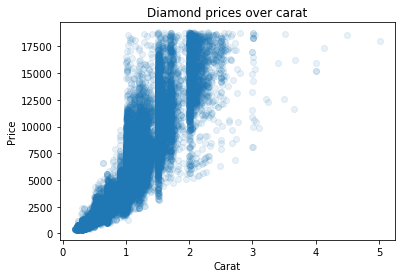

In [24]:
#Plot 1: show the old diamond price graph by putting carat on x axis, and price on y axis.
fig,ax = plt.subplots()
ax.scatter(x=diamond['carat'],y=diamond['price'], alpha=0.1)
ax.set(title='Diamond prices over carat',
      ylabel='Price',
      xlabel='Carat')
plt.show()

In [25]:
#import new diamond file and make predictions
new_diamond = pd.read_csv('new-diamonds.csv',header=0,index_col=0)
new_diamond.head()

,carat,cut,cut_ord,color,clarity,clarity_ord
1,1.22,Premium,4,G,SI1,3
2,1.01,Good,2,G,VS2,5
3,0.71,Very Good,3,I,VS2,5
4,1.01,Ideal,5,D,SI2,2
5,0.27,Ideal,5,H,VVS2,6


In [26]:
new_diamond.describe()

,carat,cut_ord,clarity_ord
count,3000.000000,3000.000000,3000.000000
mean,0.795440,3.908667,4.119333
std,0.475891,1.108182,1.663535
min,0.210000,1.000000,1.000000
25%,0.400000,3.000000,3.000000
50%,0.700000,4.000000,4.000000
75%,1.030000,5.000000,5.000000
max,3.010000,5.000000,8.000000


In [27]:
#add predicted prices column
new_diamond['price']=-5243 + 8355*new_diamond['carat'] + 158.9*new_diamond['cut_ord'] + 457.5*new_diamond['clarity_ord']
new_diamond.head()

,carat,cut,cut_ord,color,clarity,clarity_ord,price
1,1.22,Premium,4,G,SI1,3,6958.20
2,1.01,Good,2,G,VS2,5,5800.85
3,0.71,Very Good,3,I,VS2,5,3453.25
4,1.01,Ideal,5,D,SI2,2,4905.05
5,0.27,Ideal,5,H,VVS2,6,552.35


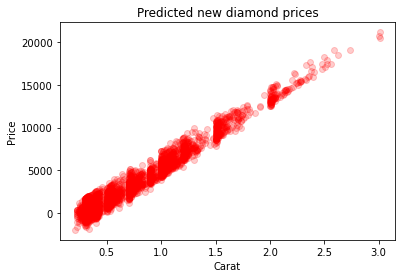

In [29]:
#Plot 2: the predicted diamonds graph
fig,ax = plt.subplots()
ax.scatter(x=new_diamond['carat'],y=new_diamond['price'],alpha=0.2,color='red')
ax.set(title='Predicted new diamond prices',
      ylabel='Price',
      xlabel='Carat')
plt.show()

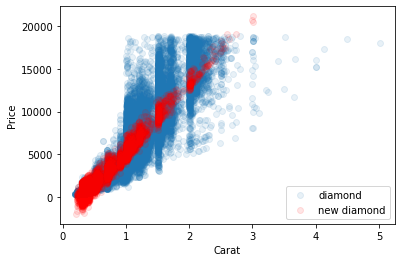

In [30]:
#Plot both sets of data on the same chart
fig, ax = plt.subplots()
ax.scatter(x=diamond['carat'],y=diamond['price'],alpha=0.1)
ax.scatter(x=new_diamond['carat'],y=new_diamond['price'],alpha=0.1,color='red')
ax.set(ylabel='Price',
      xlabel='Carat')
ax.legend(['diamond','new diamond'])
plt.show()

In [31]:
#Sum all the predicted prices together in order to give purchasing recommendations
sum_price = new_diamond['price'].sum()
print(sum_price)

11725750.0
